In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
# Load IMDB dataset
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
# Build the model
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5557 - loss: 0.6900 - val_accuracy: 0.7264 - val_loss: 0.6656
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7221 - loss: 0.6483 - val_accuracy: 0.7640 - val_loss: 0.5703
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7965 - loss: 0.5349 - val_accuracy: 0.8108 - val_loss: 0.4538
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8439 - loss: 0.4137 - val_accuracy: 0.8504 - val_loss: 0.3756
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8721 - loss: 0.3411 - val_accuracy: 0.8636 - val_loss: 0.3426
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8829 - loss: 0.3019 - val_accuracy: 0.8700 - val_loss: 0.3195
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8932 - loss: 0.2731 - val_accuracy: 0.8736 - val_loss: 0.3060
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9074 - loss: 0.2465 - val_accuracy: 0.8814 - v

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.2990
Test Accuracy: 0.8720


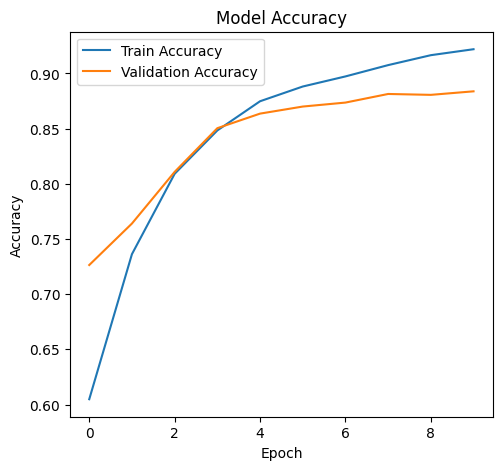

In [9]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

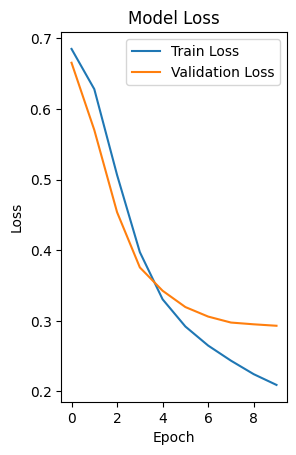

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [12]:
# Show sample predictions
y_pred_probs = model.predict(x_test[:10])
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [13]:
for i in range(10):
    print(f"Review {i+1} - Predicted: {'Positive' if y_pred_classes[i][0] == 1 else 'Negative'},
                           Actual: {'Positive' if y_test[i] == 1 else 'Negative'}")

Review 1 - Predicted: Negative, Actual: Negative
Review 2 - Predicted: Positive, Actual: Positive
Review 3 - Predicted: Positive, Actual: Positive
Review 4 - Predicted: Negative, Actual: Negative
Review 5 - Predicted: Positive, Actual: Positive
Review 6 - Predicted: Positive, Actual: Positive
Review 7 - Predicted: Positive, Actual: Positive
Review 8 - Predicted: Negative, Actual: Negative
Review 9 - Predicted: Positive, Actual: Negative
Review 10 - Predicted: Positive, Actual: Positive
